In [78]:
import numpy as np
import random
import numpy.random as rd
import matplotlib.pyplot as plt
from scipy import special
import timeit
from math import pi, sqrt, exp

**ALGORITHME DE REJET**

In [258]:
#https://www.youtube.com/watch?v=1ptmo6CPKuQ&list=WL&index=1

def h(x): #Densité de U[0,1]
    if x>=0 and x<=1:
        return 1
    return 0

def f(x): #Beta(2.7;6.3) page 27
    return x**(1.7)*(1-x)**(5.3)*1/(special.beta(2.7,6.3))

def algo_rejet(n, c = 2.670): #La densité candidate g sera U[0, 1]
    A_a, A_o = [], []  #Abscisses et ordonnés des points acceptés
    R_a, R_o = [], []  #Abscisses et ordonnés des points rejetés
    i = 0
    while i < n : 
        y = random.uniform(0, 1)
        u = random.uniform(0, 1)
        if u <= f(y)/(c*h(y)) :
            A_a.append(y)
            A_o.append(u*c*h(y))
        else:
            R_a.append(y)
            R_o.append(u*c*h(y))
        i += 1
    return A_a, A_o, R_a, R_o

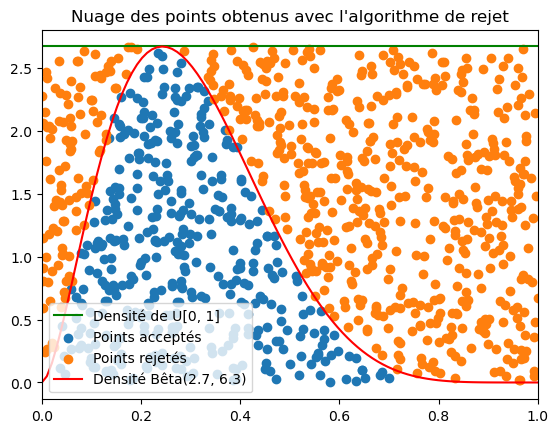

In [259]:
A = np.linspace(0, 1, 100)
B = [f(a) for a in A]
Z = algo_rejet(1000, c = 2.670)
H = [h(a)*2.67 for a in A]

plt.plot(A, H, label = 'Densité de U[0, 1]', color = 'green')
plt.scatter(Z[0], Z[1], label = 'Points acceptés')
plt.scatter(Z[2],Z[3], label = 'Points rejetés')
plt.plot(A, B, label = 'Densité Bêta(2.7, 6.3)', color = 'red')
plt.xlim([0, 1])
plt.title("Nuage des points obtenus avec l'algorithme de rejet")
plt.legend()
plt.show()

In [248]:
print(len(Z[0]) + len(Z[2]))

1000


**Comparaison des temps d'exécution**

25.1 ms ± 1.11 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


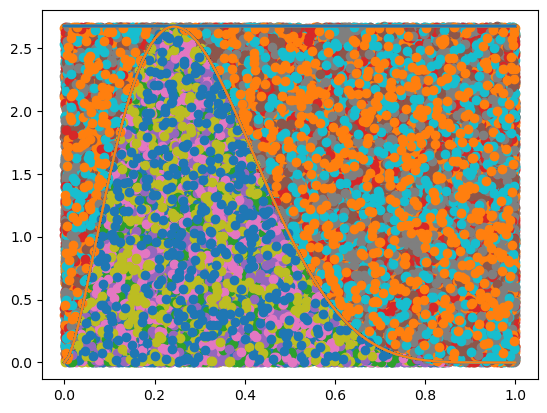

In [113]:
%%timeit
A = np.linspace(0, 1, 100)
B = [f(a) for a in A]
Z = algo_rejet(1000, c = 2.670)
H= [h(a)*2.67 for a in A]
plt.plot(A,H)
plt.scatter(Z[0], Z[1])
plt.scatter(Z[2],Z[3])
plt.plot(A, B)

C:\Users\21200395\AppData\Local\Temp\14\ipykernel_45792\2403480554.py:9: RuntimeWarning: invalid value encountered in power
  return x**(1.7)*(1-x)**(5.3)*1/(special.beta(2.7,6.3))


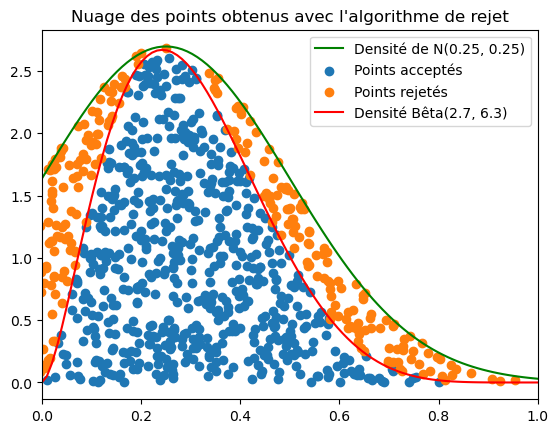

In [250]:
def N(x):
    return (1/(0.25*sqrt(2*pi)))*exp(-0.5*((x - 0.25)/0.25)**2) #Densité de N(0.25, 0.25)

def algo_rejet(n, c = 1.69): #La densité candidate g sera U[0, 1]
    A_a, A_o = [], []  #Abscisses et ordonnés des points acceptés
    R_a, R_o = [], []  #Abscisses et ordonnés des points rejetés
    i = 0
    while i < n : 
        y = rd.normal(0.25, 0.25, 1)
        u = random.uniform(0, 1)
        if u <= f(y)/(c*N(y)) :
            A_a.append(y)
            A_o.append(u*c*N(y))
        else:
            R_a.append(y)
            R_o.append(u*c*N(y))
        i += 1
    return A_a, A_o, R_a, R_o

X = algo_rejet(1000, c = 1.69)
K= [N(a)*1.69 for a in A]
plt.plot(A, K, label = 'Densité de N(0.25, 0.25)', color = 'green')
plt.scatter(X[0], X[1], label = 'Points acceptés')
plt.scatter(X[2],X[3], label = 'Points rejetés')
plt.plot(A, B, label = 'Densité Bêta(2.7, 6.3)', color = 'red')
plt.xlim([0, 1])
plt.title("Nuage des points obtenus avec l'algorithme de rejet")
plt.legend()
plt.show()

In [260]:
print(f'Le ratio acceptés/total pour N(0.25, 0.25) est {len(X[0])/(len(X[0]) + len(X[2]))}')
print(f'Le ratio acceptés/total pour U[0, 1] est {len(Z[0])/(len(Z[0]) + len(Z[2]))}')

Le ratio accepté/total pour N(0.25, 0.25) est 0.597
Le ratio accepté/total pour U[0, 1] est 0.388
